# Time Series Data

This section focus on the time series part of the project and it contains the answers for questions 1-3. 

## Setup (Google Colab)

The dataset being used in the following: 
https://www.kaggle.com/competitions/g-research-crypto-forecasting/data

It contains minute price data of 14 different crypto coins between 2018 and 2021. The dataset also has Target price and the Volume Weighted Average price per minute, both values that can be used for time series prediction.

The code will be developed using only bitcoin data, but it can be replicated to the other currencies in the dataset.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from google.colab import drive
import seaborn as sns
plt.style.use('fivethirtyeight')
cmap = sns.color_palette()
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Changes the working directory to where the dataset is located
path = '/content/drive/My Drive/Python/Kaggle/g-research-crypto-forecasting'
os.chdir(path)

In [ ]:
#Reads the csv file
train = pd.read_csv('train.csv')

## Question 1 - Data Exploration

Provide appropriate plots and interpretations for the attributes of the dataset.
Analysis should include the standalone attributes as well relationships amongst
the attributes.

In [ ]:
#Diplays part of the dataset
train

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


The following is a description of the dataset attributes:

timestamp - A timestamp for the minute covered by the row.

Asset_ID - An ID code for the cryptoasset.

Count - The number of trades that took place this minute.

Open - The USD price at the beginning of the minute.

High - The highest USD price during the minute.

Low - The lowest USD price during the minute.

Close - The USD price at the end of the minute.

Volume - The number of cryptoasset units traded during the minute.

VWAP - The volume weighted average price for the minute.

Target - 15 minute residualized returns.

In [ ]:
#Displays the 14 coins present on the dataset
assets = pd.read_csv('asset_details.csv')
assets.sort_values('Weight', ascending = False)

,Asset_ID,Weight,Asset_Name
2,1,6.779922,Bitcoin
5,6,5.894403,Ethereum
10,3,4.406719,Cardano
1,0,4.304065,Binance Coin
13,4,3.555348,Dogecoin
0,2,2.397895,Bitcoin Cash
6,9,2.397895,Litecoin
4,7,2.079442,Ethereum Classic
9,12,2.079442,Stellar
8,13,1.791759,TRON


### Data Visualization

In [ ]:
#Gets all the data points that refer to bitcoin
btc = train[train.Asset_ID == 1]
btc.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
2,1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643
10,1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037
18,1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309
26,1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999
34,1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079


#### Trade count barplot

This barplot will be used to analyze how much each coin was used between 2018 and 2021.

In [ ]:
#Creates an array with the sum of all total trades for each asset
total_trades = []

for i in asset_list:
  total_trades.append(np.sum(i['Count']))

print(total_trades)

[2117460311.0, 1348034155.0, 362195877.0, 299985406.0, 428883115.0, 549295778.0, 480125009.0, 252805308.0, 53310868.0, 441414221.0, 33485351.0, 59209021.0, 211747363.0, 304907865.0]


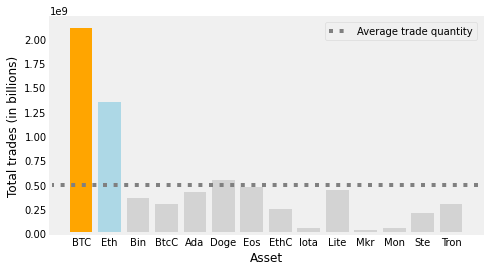

In [ ]:
fig = plt.figure(figsize = (6, 3))
ax = fig.add_axes([0, 0, 1, 1])

#Creates a list of colors to be used in the barplot
colors = ['orange', 'lightblue']
for i in range(0, 12):
  colors.append('lightgray')

#Plots the data
ax.bar(asset_names_abr, total_trades, color=colors)
plt.axhline(y=np.average(total_trades), label = 'Average trade quantity', 
            c = 'gray', ls=':')
plt.ylabel('Total trades (in billions)')
plt.xlabel('Asset')
plt.legend()
plt.grid(False)
plt.show()
f.clear()
plt.close(f)

#### Closing Price Plot

In [ ]:
def plot_data(data, title):
  f = plt.figure(figsize = (10,6))
  plt.plot(data)
  plt.xlabel('Time')
  plt.ylabel('Close Price')
  plt.axvline(x = 1546300800, label = 'Start of 2019', c = 'orange')
  plt.axvline(x = 1577836800, label = 'Start of 2020', c = 'forestgreen')
  plt.axvline(x = 1609459200, label = 'Start of 2021', c = 'crimson')
  plt.grid()
  plt.legend()
  plt.title('Close price vs Time')
  plt.show()

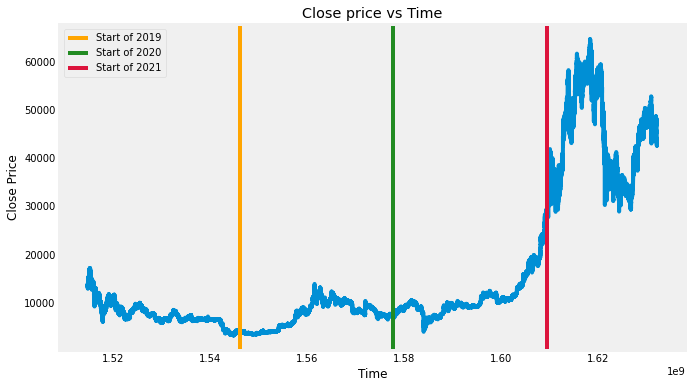

In [ ]:
plot_data(btc['Close'])

### Data Wrangling

Investigate missing values, change data format if necessary

In [ ]:
#Check how many values are missing per column
btc.isna().sum()

timestamp     0
Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target       76
dtype: int64

In [ ]:
#Since the target column has few missing values, and because the data 
#is given in minutes, we can use ffill to fill the missing values with previous values
btc = btc.fillna(method='ffill')
btc.isna().sum()

timestamp    0
Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target       0
dtype: int64

In [ ]:
#Check to see if the interval bvetween each timestamp is 60 seconds
print((btc.index[1:]-btc.index[:-1]).value_counts().head())

14    596514
12    495202
13    443611
11    214273
8      78696
dtype: int64


In [ ]:
btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method = 'pad')
print((btc.index[1:]-btc.index[:-1]).value_counts().head())

60    403947
dtype: int64


## Question 2 - Time series forecasting

Do the time series analysis and forecasting predictions of the dataset. Provide the
appropriate plots and interpretations

Performs regression and SARIMA to create functions that will try to fit the Bitcoin price data

### SARIMA Model

In [ ]:
from sklearn import preprocessing
import datetime
import statsmodels.api as sm
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Gets the interval with most variance from the data
x = np.array(btc['Close'][1500000:1800000]).reshape(-1, 1)
y = btc['Close'][1800000:]

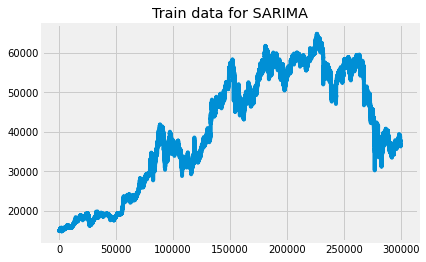

In [ ]:
plt.plot(x)
plt.title("Train data for SARIMA")
plt.show()

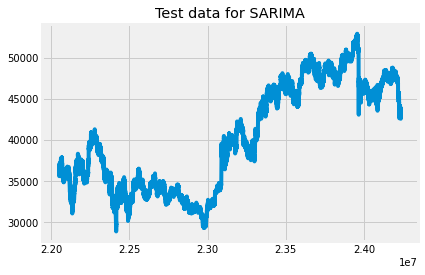

In [ ]:
plt.plot(y)
plt.title("Test data for SARIMA")
plt.show()

In [ ]:
model_sarima = sm.tsa.statespace.SARIMAX(x, order=(1, 1, 1), seasonal_order=(1,1,1,12),
                                 enforce_stationarity=False, enforce_invertibility=False)
model_sarima_fit = model_sarima.fit()  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
prediction_sarima=model_sarima_fit.forecast(np.shape(y)[0])

print(model_sarima_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_sarima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               456282
Model:               SARIMAX(1, 1, 1)   Log Likelihood              305020.730
Date:                Sun, 01 May 2022   AIC                        -610035.459
Time:                        20:49:26   BIC                        -610002.367
Sample:                             0   HQIC                       -610026.055
                             - 456282                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   8.14e-07   1.23e+06      0.000       1.000       1.000
ma.L1         -0.9461   7.38e-05  -1.28e+04      0.000      -0.946      -0.946
sigma2         0.0154   3.14e-06   4917.724      0.0

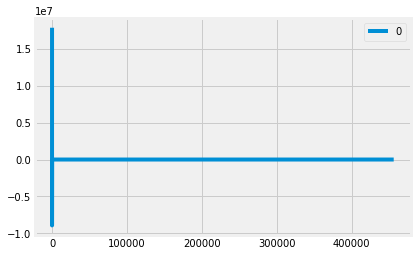

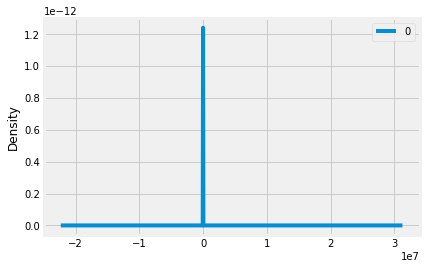

                  0
count  4.562820e+05
mean   1.956803e+01
std    2.955505e+04
min   -8.928152e+06
25%    6.782077e-04
50%    6.782077e-04
75%    6.785132e-04
max    1.785638e+07


In [ ]:
prediction_sarima=model_sarima_fit.forecast(np.shape(y)[0])

print(model_sarima_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_sarima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
print(y.values)

[15007.39285714 14989.53717619 14999.69857143 ... 42827.02
 43017.27714286 43002.505     ]


In [ ]:
pred_active =  pd.Series(prediction_sarima)
pred_active = pred_active/max(pred_active)
y_normalized = pd.Series(y/max(y))

plt.figure(figsize=(12,6))
plt.plot(pred_active, color = 'red', label = "SARIMA Prediction")
plt.plot(y_normalized.values, color = "blue", label = "Actual data")
plt.xlabel("Time")
plt.ylabel("Value (Normalized)")
plt.title("SARIMA Bitcoin Price Prediction")
plt.grid(False)
plt.legend()
plt.show()

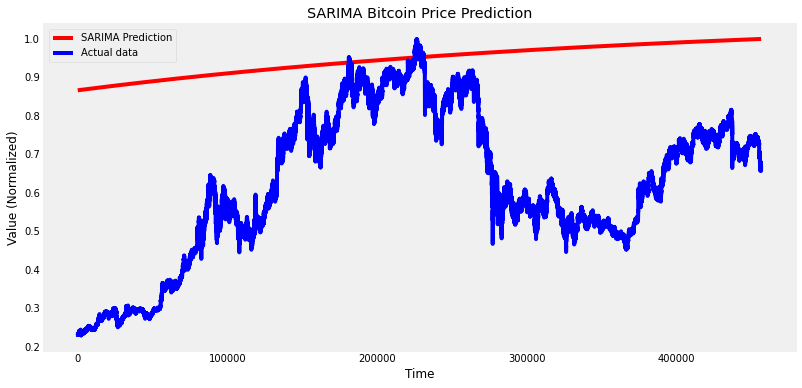

In [ ]:
pred_active =  pd.Series(prediction_sarima)
pred_active = pred_active/max(pred_active)
y_normalized = pd.Series(y/max(y))

plt.figure(figsize=(12,6))
plt.plot(pred_active, color = 'red', label = "SARIMA Prediction")
plt.plot(y_normalized.values, color = "blue", label = "Actual data")
plt.xlabel("Time")
plt.ylabel("Value (Normalized)")
plt.title("SARIMA Bitcoin Price Prediction")
plt.grid(False)
plt.legend()
plt.show()

The SARIMA model was not able to capture the overrall trend of the Bitcoin price data. This can be due to how the data is framed in minutes, rather than days or months.

### LSTM Prediction (Bonus)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense, Activation, Dropout
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional

In [ ]:
#Normalizes bitcoin data
scaled_btc = btc['Close']/(max(btc['Close']))
scaled_btc = np.array(scaled_btc, dtype='float')
plt.plot(scaled_btc)

In [ ]:
#Reshapes data
scaled_btc = scaled_btc.reshape(int(len(scaled_btc)/60), 60, 1)
scaled_btc.shape

In [ ]:
#Split into train and test set
def train_test_split(x, y):
  train_data = scaled_btc

  x_train = np.zeros((int(train_data.shape[0]*0.8), x, 1))
  y_train = np.zeros((int((train_data.shape[0])*0.8), y, 1))

  for i in range(int(len(train_data)*0.8)):
    x_train[i] = train_data[i][:x]
    y_train[i] = train_data[i][x:]

  x_val = np.zeros((int(train_data.shape[0]*0.2), x, 1))
  y_val = np.zeros((int(train_data.shape[0]*0.2), y, 1))

  for i in range(int(len(train_data)*0.2)):
    x_val[i] = train_data[int(i+(train_data.shape[0]*0.8))][:x]
    y_val[i] = train_data[int(i+(train_data.shape[0]*0.8))][x:]


  x_train = x_train.reshape(26092, 1, x)
  y_train = y_train.reshape(26092, 1, y)

  y_val = y_val.reshape(6523, 1, y)
  x_val = x_val.reshape(6523, 1, x)


  print(x_train.shape, y_train.shape)
  print(x_val.shape, y_val.shape)

  return x_train, y_train, x_val, y_val

In [ ]:
x_train, y_train, x_val, y_val = train_test_split(59,1)

In [ ]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(Bidirectional(LSTM((300), recurrent_activation='tanh', 
                             return_sequences=True), 
                            batch_input_shape=(None, 1, 59)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM((200), return_sequences=False, 
                             recurrent_activation='tanh')))
model.add(Dropout(0.25))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics='accuracy')
#model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 600)           864000    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 1, 600)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 400)              1281600   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense (Dense)               (None, 1)                 401       
                                                                 
Total params: 2,146,001
Trainable params: 2,146,001
Non-

In [ ]:
# Fits the x_train and y_train data into the model
history = model.fit(x_train, y_train, batch_size = 10, epochs= 10, validation_data=(x_val, y_val))

Epoch 1/10
2610/2610 [==============================] - 267s 101ms/step - loss: 8.1944e-04 - accuracy: 0.0000e+00 - val_loss: 0.0299 - val_accuracy: 0.0000e+00
Epoch 2/10
2610/2610 [==============================] - 310s 119ms/step - loss: 7.3140e-05 - accuracy: 0.0000e+00 - val_loss: 0.0070 - val_accuracy: 0.0000e+00
Epoch 3/10
2610/2610 [==============================] - 235s 90ms/step - loss: 5.1430e-05 - accuracy: 0.0000e+00 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 4/10
2610/2610 [==============================] - 288s 110ms/step - loss: 4.1099e-05 - accuracy: 0.0000e+00 - val_loss: 0.0632 - val_accuracy: 0.0000e+00
Epoch 5/10
2610/2610 [==============================] - 369s 141ms/step - loss: 3.7914e-05 - accuracy: 0.0000e+00 - val_loss: 0.0548 - val_accuracy: 0.0000e+00
Epoch 6/10
2610/2610 [==============================] - 292s 112ms/step - loss: 3.7460e-05 - accuracy: 0.0000e+00 - val_loss: 0.1189 - val_accuracy: 0.0000e+00
Epoch 7/10
2610/2610 [===================

In [ ]:
model.save_weights('btc_minute1.h5')

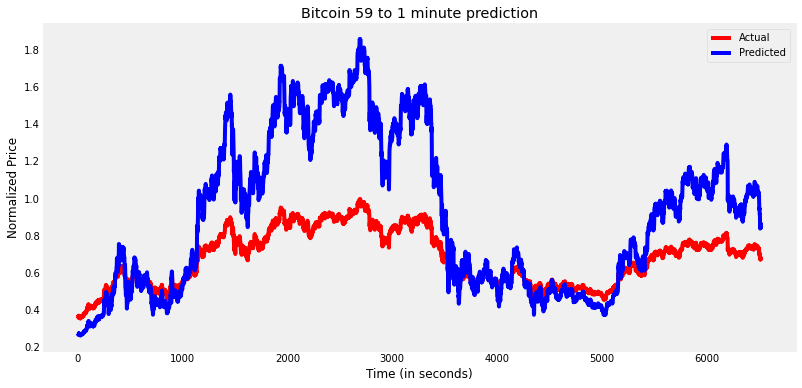

In [ ]:
predictions = model.predict(x_val)
plt.figure(figsize=(12,6))
plt.plot(y_val.reshape(y_val.shape[0]), c = "red", label = "Actual")
plt.plot(predictions, c = "blue", label = "Predicted")
plt.legend()
plt.grid(False)
plt.title("Bitcoin 59 to 1 minute prediction")
plt.xlabel("Time (in seconds)")
plt.ylabel("Normalized Price")
plt.show()

We can see that the LSTM was able to capture the price trend of Bitcoin, although it overshoot its price whenever Bitcoin was on an up trend.

## Question 3 - Linear and Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
x = np.array(btc.index).reshape(-1, 1)
y = btc['Close']

In [ ]:
linreg = LinearRegression().fit(x, y)
linreg.score(x, y)
predictions = linreg.predict(x)

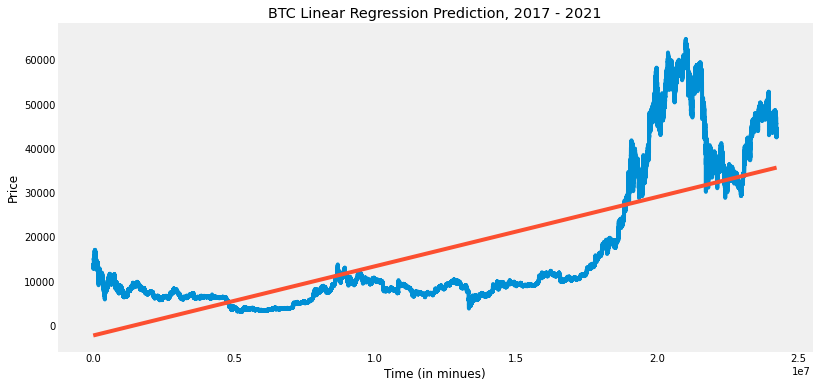

In [ ]:
plt.figure(figsize=(12,6))
plt.title('BTC Linear Regression Prediction, 2017 - 2021')
plt.ylabel('Price')
plt.xlabel('Time (in minues)')
plt.grid(False)
plt.plot(btc['Close'])
plt.plot(btc.index, predictions)
plt.show()

In [ ]:
print('The R^2 value is:', linreg.score(x, y))

The R^2 value is: 1.0


The value of R indicates that a linear fit is far from ideal to be used for forecasting bitcoin price data. The fit is too skewed due to the inital price data from bitcoin consisting mostly of low values.

### Polynomial Regression

In [ ]:
#Creates polynomial features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

#Transforms data
X_quad = quadratic.fit_transform(x)
X_cubic = cubic.fit_transform(x)

In [ ]:
#Linear Fit
lr = LinearRegression()
X_fit = np.arange(x.min(), x.max())[:, np.newaxis]

lr.fit(x, y)
y_lin_fit = lr.predict(X_fit)

In [ ]:
#X^2 fit
linear_r2 = r2_score(y, lr.predict(x))
lr.fit(X_quad, y)

y_quad_fit = lr.predict(quadratic.fit_transform(X_fit))

quadratic_r2 = r2_score(y, lr.predict(X_quad))
lr.fit(X_cubic, y)

LinearRegression()

In [ ]:
#X^3 Fit
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, lr.predict(X_cubic))

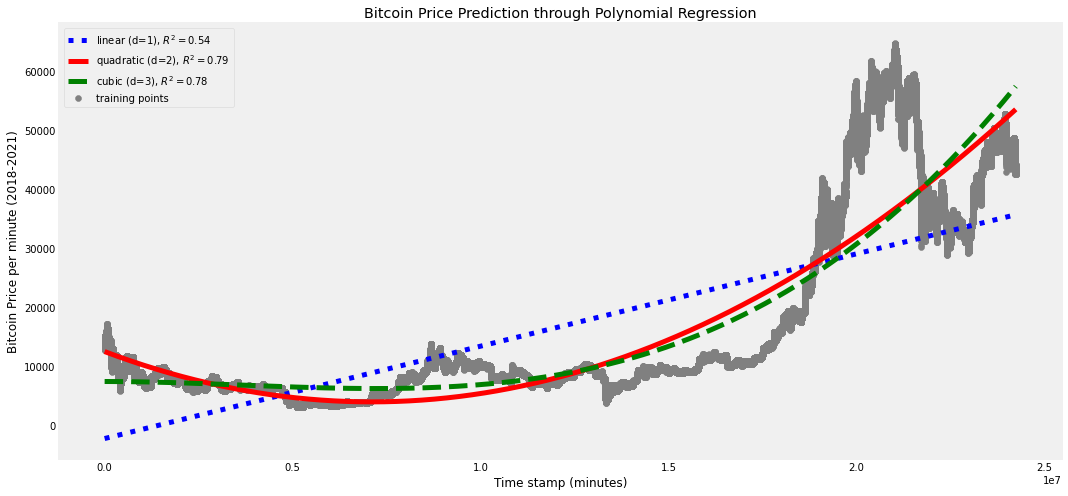

In [ ]:
#Plots figure

plt.figure(figsize=(16, 8))
plt.scatter(x, y, label='training points', color='gray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=5, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red', 
         lw=5,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2={:.2f}$'.format(cubic_r2),
         color='green', 
         lw=5, 
         linestyle='--')

plt.grid(False)
plt.title('Bitcoin Price Prediction through Polynomial Regression')
plt.xlabel('Time stamp (minutes)')
plt.ylabel('Bitcoin Price per minute (2018-2021)')
plt.legend(loc='upper left');

We can see from the plot that both the Quadradic and Cubic fit performed significantly better than the linear one, as they were able to beter capture the overral trend of the data, and weren't very affected by the variance in price range.

# Machine Learning Data

This section focus on the machine learning part of the project and it contains the answers for question 3-7

The dataset being used is the following:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

It contains the data of 303 patients, and the target variable is to determine wether the patient lived or died. This is useful to determine what conditions can be lethal.

## Question 1 - Data Exploration

In [ ]:
#Changes the working directory to where the dataset is located
path = '/content/drive/My Drive/Python/Kaggle'
os.chdir(path)

In [ ]:
#Reads the csv file
data = pd.read_csv('heart.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


General overview of the attributes.

1) age

2) sex - (1 = male; 0 = female)

3) cp - chest pain type (4 values)

4) trestbps - resting blood pressure

5) chol - serum cholestoral in mg/dl

6) fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7) restecg - resting electrocardiographic results (values 0,1,2)

8) thalach - maximum heart rate achieved

9) exang - exercise induced angina (1 = yes; 0 = no)

10) oldpeak - ST depression induced by exercise relative to rest

11) slope - the slope of the peak exercise ST segment

12) ca - number of major vessels (0-3) colored by flourosopy

13) thal - 0 = normal; 1 = fixed defect; 2 = reversable defect.

14) target - (1 = died; 0 = lived)

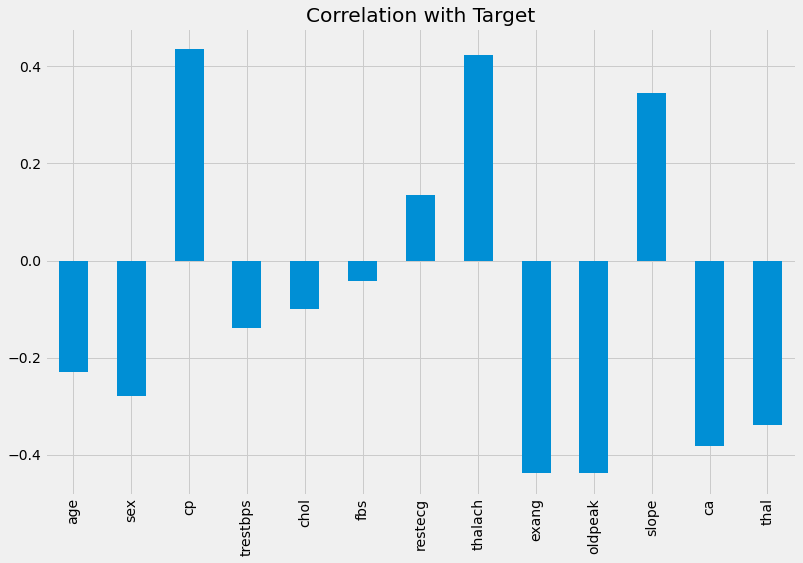

In [ ]:
data.drop('target', axis=1).corrwith(data.target).plot(kind = 'bar', grid = True, 
                                                        figsize = (12, 8), 
                                                        title = "Correlation with Target")
plt.show()

Chest pain has the highest correlation with pacients that died.

Exercise has the highest correlation with patients that survived.

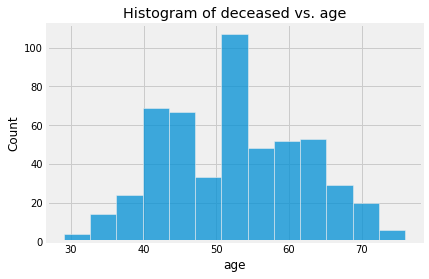

In [ ]:
deceased = data.age.where(data.target == 1)

sns.histplot(deceased)
plt.title('Histogram of deceased vs. age')

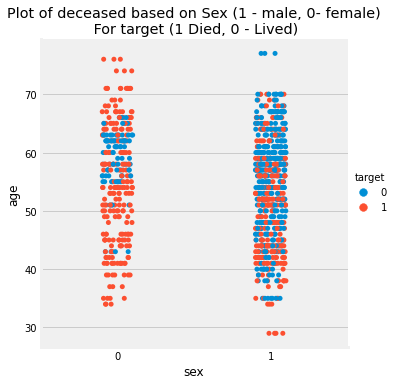

In [ ]:
sns.catplot(x='sex',y='age',hue='target',data=data)
plt.title("Plot of deceased based on Sex (1 - male, 0- female)\n For target (1 Died, 0 - Lived)")
plt.show()

## Split Data between train and test

In [ ]:
#Sets the target to be whether the patient lived or died
#Uses the other 13 attributes to make the prediction
x = data.drop(columns=['target'])
y = data.target

In [ ]:
#Scales data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=100)

## Question 3 - Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86       119
           1       0.85      0.93      0.89       138

    accuracy                           0.88       257
   macro avg       0.88      0.87      0.88       257
weighted avg       0.88      0.88      0.88       257



In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 97,  22],
       [  9, 129]])

226 right predictions (97(true positive) and 129(true negative))

22(false positive)

9(false negative)


In [ ]:
#Shows the area under the curve score
auc = roc_auc_score(y_test,y_pred)
auc

0.8749543295579102

An AOC score tells how good the model is in classifying between different classes. The greater the score, the better the model (with a score of 1 being the maximum)

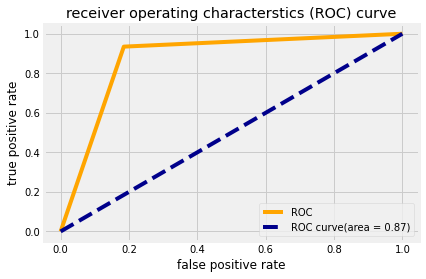

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

The final accuracy of the logistic regression is 88%

## Question 4 - PCA 

Using Principal Component Analysis, determine which attributes are important
for the analysis. (Do one analysis of SelectKBest features for important
attributes and another using PCA for important components)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=5), GaussianNB())
unscaled_clf.fit(x_train, y_train)
pred_test = unscaled_clf.predict(x_test)

In [ ]:
print('\nPrediction accuracy for the test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the test dataset with PCA
84.44%



In [ ]:
std_clf = make_pipeline(StandardScaler(),
                        PCA(n_components=5), GaussianNB())

std_clf.fit(x_train, y_train)

pred_test_std = std_clf.predict(x_test)

In [ ]:
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
85.21%



By trial and error, I found n_components = 5 produced the best accuracy results.

In [ ]:
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

In [ ]:
# Use PCA without and with scale on X_train data for visualization.

x_train_transformed = pca.transform(x_train)
scaler = std_clf.named_steps['standardscaler']
x_train_std_transformed = pca_std.transform(scaler.transform(x_train))

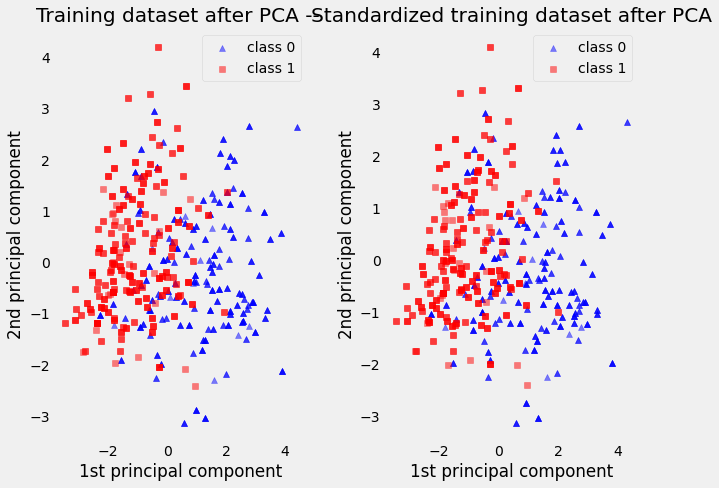

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))


for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax1.scatter(x_train_transformed[y_train == l, 0],
                x_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax2.scatter(x_train_std_transformed[y_train == l, 0],
                x_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA -- ')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
    
plt.tight_layout()

There is no significant difference between the normal Training set and the Standardized set.


## Question 5 - Decision Tree

Perform classification analysis using Naïve Bayes, Decision trees, and Support
Vector machine algorithms. Provide the appropriate plots and interpretations.

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree

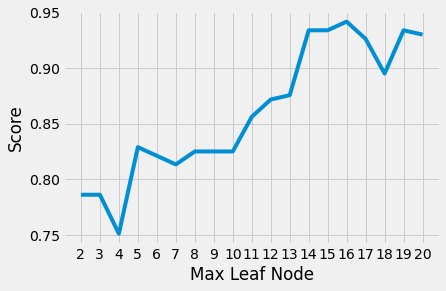

Maximum Max Leaf Node Score is 94.16%
Max Leaf Node with highest score:  15


In [ ]:
#to determine optimum number of maximum leaf nodes 
scoreList = []
for i in range(2,21):
    dt2 = DecisionTreeClassifier(max_leaf_nodes = i)  # n_neighbors means k
    dt2.fit(x_train, y_train)
    scoreList.append(dt2.score(x_test, y_test))
    
plt.plot(range(2,21), scoreList)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Max Leaf Node")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum Max Leaf Node Score is {:.2f}%".format(acc))
print("Max Leaf Node with highest score: ", (scoreList.index(max(scoreList))+1)) #+1 as index starts from 0 in array

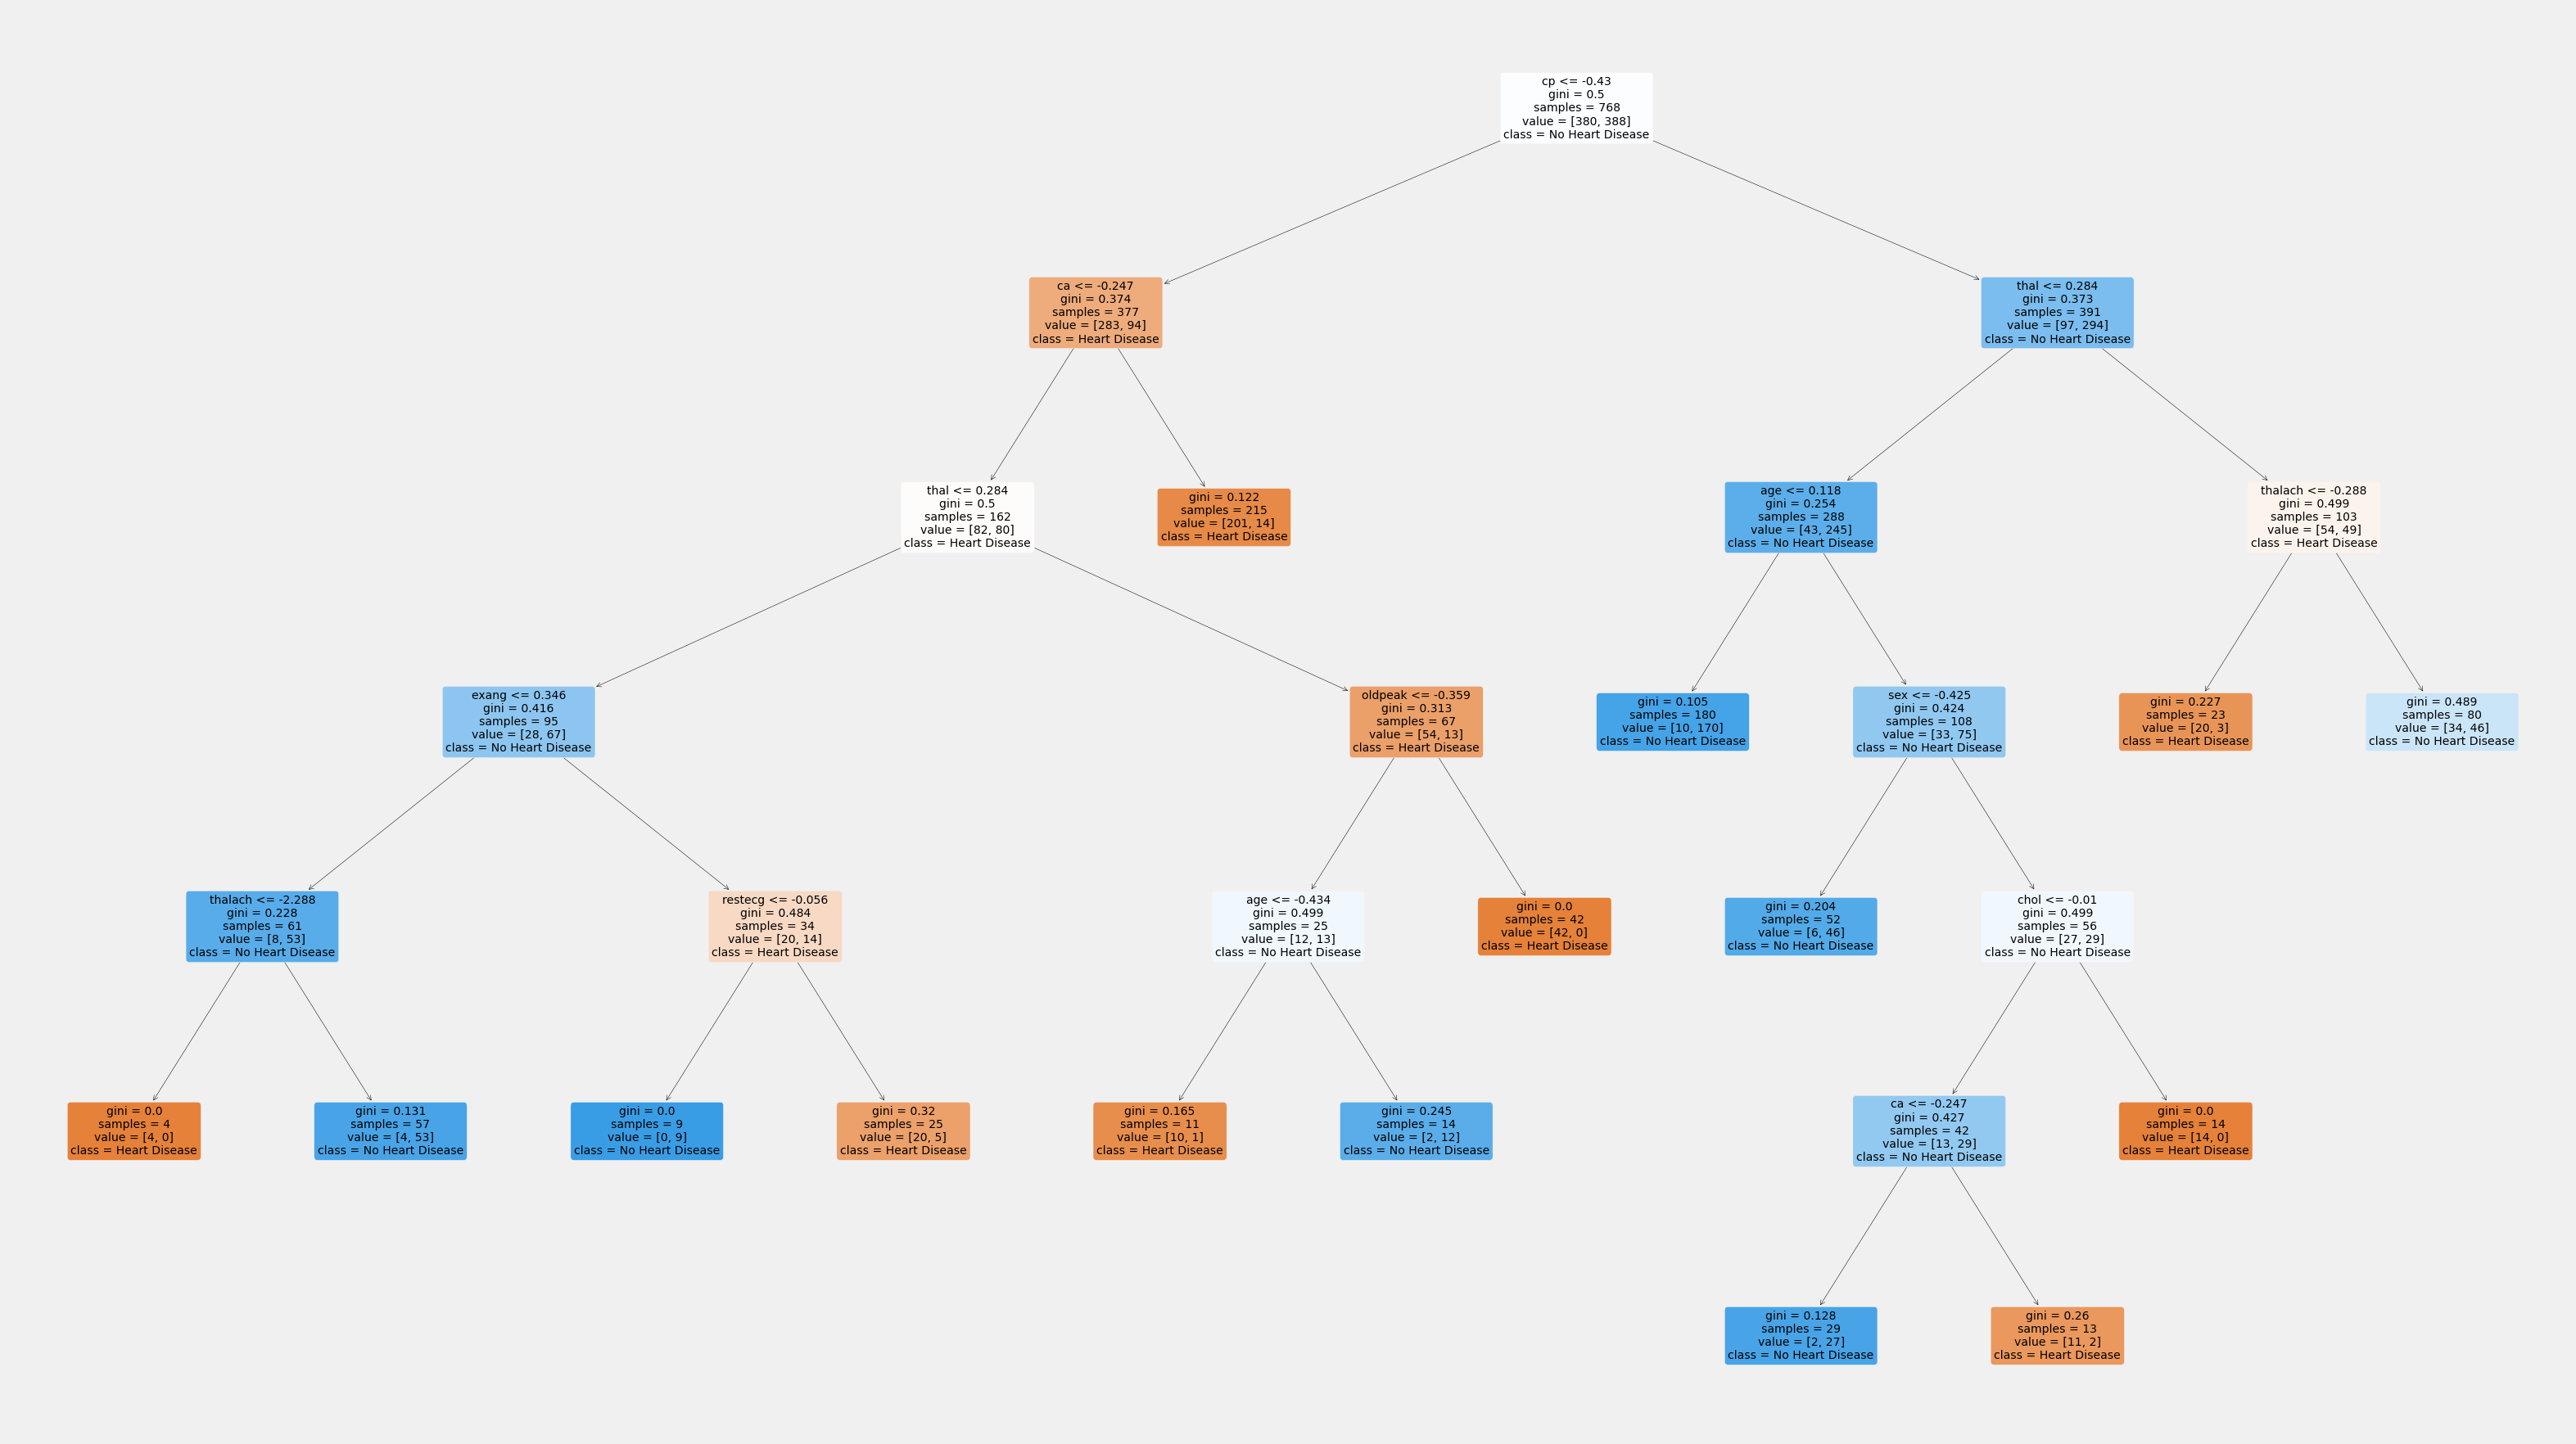

In [ ]:
DT = DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)
DT = DT.fit(x_train,y_train)
plt.figure(figsize=(50,30))
a = plot_tree(DT, 
              feature_names=list(data.drop(["target"], axis=1)), 
              class_names=["Heart Disease","No Heart Disease"], 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [ ]:
dt_pred = DT.predict(x_test)
print("Accuracy of Decision Tree: ", accuracy_score(y_test, dt_pred))

Accuracy of Decision Tree:  0.933852140077821


Decision Tree Algorithm Obtained 93% Accuracy

## Question 6 - Clustering

Do the clustering techniques on the dataset. Provide the appropriate plots and
interpretations. Note: Use any two clustering methods.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeans.fit(x_train)

KMeans(n_clusters=5, random_state=0)

In [ ]:
scaler = MinMaxScaler()
feature = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1',
       'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],


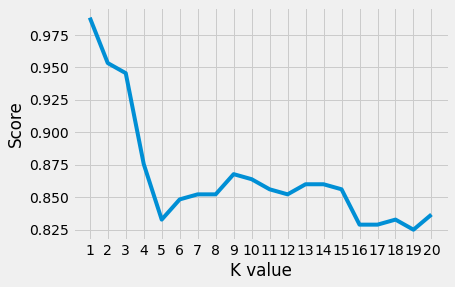

Maximum KNN Score is 98.83%
K Value with highest score:  1


In [ ]:
#to determine optimum number of neighbours
scoreList = []
for i in range(1,21):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,21), scoreList)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))
print("K Value with highest score: ", (scoreList.index(max(scoreList))+1)) #+1 as index starts from 0 in array

In [ ]:
#modeling KNN 
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_pred = knn.predict(x_test)

In [ ]:
print("Accuracy of KNN: ", accuracy_score(y_test, knn_pred))

Accuracy of KNN:  0.9571984435797666


KNN accuracy is 95%

## Question 7 - Pipeplines

Run pipelines with the above algorithms but with PCA being applied.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Pipeline for Logistic Regression
pipe_lr=Pipeline([('scalar1',StandardScaler()),
                  ('pca1',PCA(n_components=5)), 
                  ('lr_classifier',LogisticRegression())
                 ])

In [ ]:
# Pipeline for Decision Tree Classifier
pipe_dt=Pipeline([('scalar2',StandardScaler()),
                  ('pca2',PCA(n_components=5)),
                  ('dt_classifier',DecisionTreeClassifier())
                  ])

In [ ]:
# Pipeline for SVC
pipe_svm = Pipeline([('scalar3', StandardScaler()),
                     ('pca3', PCA(n_components=5)),
                     ('clf', svm.SVC())
                    ])

In [ ]:
# Pipeline for KNN Classifier 
pipe_knn=Pipeline([('scalar4',StandardScaler()),
                   ('pca4',PCA(n_components=5)),
                   ('knn_classifier',KNeighborsClassifier())
                  ])

In [ ]:
# Pipeline for Random Forest Classifier
pipe_rf=Pipeline([('scalar5',StandardScaler()),
                   ('pca5',PCA(n_components=5)),
                   ('rf_classifier',RandomForestClassifier())
                  ])

In [ ]:
print("Accuracy with PCA applied:")
pipelines = [pipe_lr, pipe_dt, pipe_svm, pipe_knn, pipe_rf]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Support Vector Machine',3:'K Nearest Neighbor',4:'Random Forest Classifier'}
for pipe in pipelines:
    pipe.fit(x_train, y_train)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],round(model.score(x_test,y_test),2)))

Accuracy with PCA applied:
Logistic Regression Test Accuracy: 0.86
Decision Tree Test Accuracy: 1.0
Support Vector Machine Test Accuracy: 0.86
K Nearest Neighbor Test Accuracy: 0.86
Random Forest Classifier Test Accuracy: 1.0


PCA Improved the accuracy of the Decision Tree by 7%, while it lowered the accuracy of the Logistic Regression by 1% and the accuracy of KNN by 9%.

With PCA, Decision Tree is the best algorithm to be used for prediction in this dataset.